## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [56]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [57]:
train, test = keras.datasets.cifar10.load_data()

In [58]:
from sklearn.preprocessing import MinMaxScaler
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    x = MinMaxScaler(feature_range=(-1, 1)).fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [59]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [60]:
input_shape = x_train.shape[1:]
output_units = 10
hidden_unit_dict = {1:512,2:256,3:128}

def build_mlp(input_shape, output_units, hidden_unit_dict):
    # input layer
    input_layer = keras.layers.Input(input_shape)
    
    # hidden layer
    for hidden_layer in hidden_unit_dict:
        if hidden_layer == 1:
            x = keras.layers.Dense(units=hidden_unit_dict[hidden_layer], 
                                   activation="relu", 
                                   name="hidden_layer"+str(hidden_layer)
                                  )(input_layer)
        else:
            x = keras.layers.Dense(units=hidden_unit_dict[hidden_layer], 
                                   activation="relu", 
                                   name="hidden_layer"+str(hidden_layer)
                                  )(x)
            
    # output layer       
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# build model    
model = build_mlp(input_shape, output_units, hidden_unit_dict)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [61]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [62]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [63]:
import time

In [64]:
tik = time.time()
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
tok = time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.6685 - acc: 0.4089 - val_loss: 1.5371 - val_acc: 0.4563
Epoch 2/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.4431 - acc: 0.4910 - val_loss: 1.4950 - val_acc: 0.4819
Epoch 3/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.3205 - acc: 0.5341 - val_loss: 1.4034 - val_acc: 0.5012
Epoch 4/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.2256 - acc: 0.5706 - val_loss: 1.3772 - val_acc: 0.5216
Epoch 5/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.1377 - acc: 0.5992 - val_loss: 1.3822 - val_acc: 0.5200
Epoch 6/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.0584 - acc: 0.6272 - val_loss: 1.3773 - val_acc: 0.5272
Epoch 7/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.9806 - acc: 0.6530 - val_loss: 1.4080 - 

50000/50000 [==============================] - 2s 49us/step - loss: 0.1151 - acc: 0.9638 - val_loss: 4.0445 - val_acc: 0.5117
Epoch 60/100
50000/50000 [==============================] - 2s 49us/step - loss: 0.0993 - acc: 0.9682 - val_loss: 4.0985 - val_acc: 0.5209
Epoch 61/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.1044 - acc: 0.9663 - val_loss: 4.0412 - val_acc: 0.5199
Epoch 62/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.1004 - acc: 0.9675 - val_loss: 4.0595 - val_acc: 0.5191
Epoch 63/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.0565 - acc: 0.9813 - val_loss: 4.1026 - val_acc: 0.5238
Epoch 64/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.0900 - acc: 0.9708 - val_loss: 4.1665 - val_acc: 0.5158
Epoch 65/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.1014 - acc: 0.9669 - val_loss: 4.1959 - val_acc: 0.5145
Epoch 66/100
50000/50000 [==============

Computational time w/ GPU = 240.52 seconds


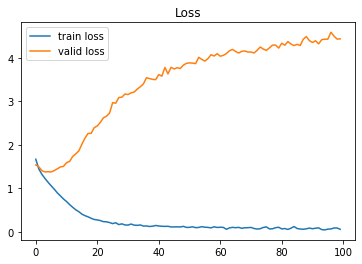

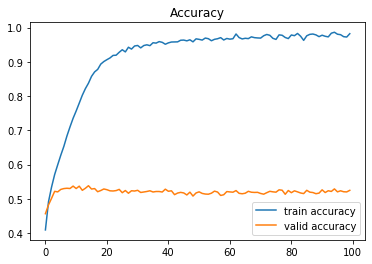

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Computational time w/ GPU = %.2f seconds" % (tok-tik))

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.6785 - acc: 0.4093 - val_loss: 1.5167 - val_acc: 0.4661
Epoch 2/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.4391 - acc: 0.4916 - val_loss: 1.4483 - val_acc: 0.4938
Epoch 3/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.3222 - acc: 0.5387 - val_loss: 1.3853 - val_acc: 0.5124
Epoch 4/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.2208 - acc: 0.5697 - val_loss: 1.3980 - val_acc: 0.5146
Epoch 5/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.1387 - acc: 0.5995 - val_loss: 1.3601 - val_acc: 0.5332
Epoch 6/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.0540 - acc: 0.6291 - val_loss: 1.3845 - val_acc: 0.5225
Epoch 7/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.9729 - acc: 0.6587 - val_loss: 1.4300 - 

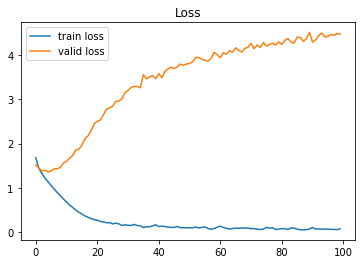

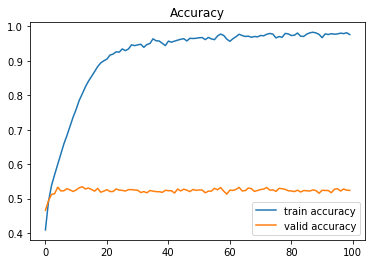

In [42]:
os.environ["CUDA_VISIBLE_DEVICES"] = ""
model = build_mlp(input_shape, output_units, hidden_unit_dict)

optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

tik = time.time()
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
tok = time.time()

print("Computational time w/o GPU = %.2f seconds" % (tok-tik))

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()